# > SCET-TechnoVanza Data science challenge 6- Meet patel- CO(M)-3rd- 180420107044

In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotifydata/spotify_data.csv


*Let's import all required modules*

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from wordcloud import WordCloud
from collections import Counter
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator
%matplotlib inline

In [82]:
df = pd.read_csv("../input/spotifydata/spotify_data.csv")

# take a look at the dataset
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [83]:
cdf = df[['valence','year','acousticness','artists','danceability','duration_ms','energy','explicit','id','instrumentalness','key','liveness','loudness','mode','name','popularity','release_date','speechiness','tempo']]
cdf.head(19)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.9820,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.7320,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.9610,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.9670,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.9570,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
5,0.1960,1921,0.5790,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395076,0.346,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.130,-12.506,1,Gati Mardika,6,1921,0.0700,119.824
6,0.4060,1921,0.9960,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,4,1921,0.0615,66.221
7,0.0731,1921,0.9930,['Sergei Rachmaninoff'],0.389,218773,0.088,0,02GDntOXexBFUvSgaXLPkd,0.527000,1,0.363,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867
8,0.7210,1921,0.9960,['Ignacio Corsini'],0.485,161520,0.130,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.104,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678
9,0.7710,1921,0.9820,['Fortugé'],0.684,196560,0.257,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.504,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378


In [84]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [85]:
df.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

# **Visualize the average energy of songs from each year (Xaxis:Year, Yaxis:avg energy for that year)**

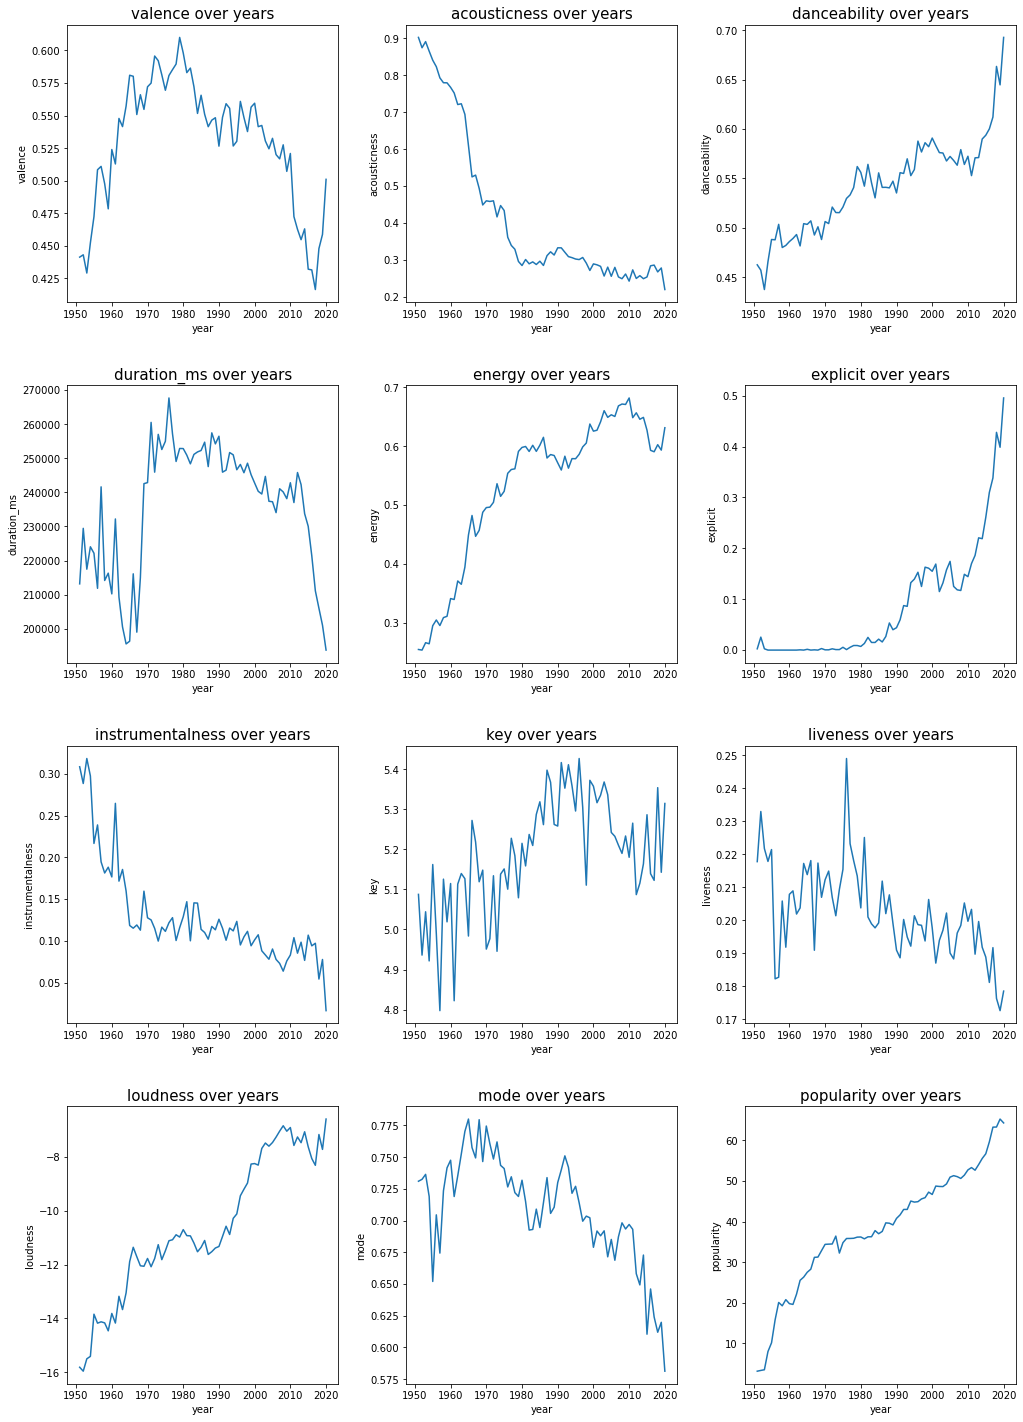

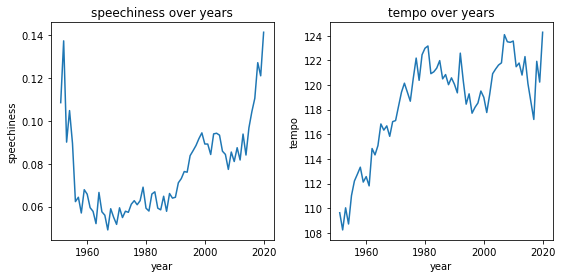

In [86]:
groups = df[df['year']>=1951].groupby(['year']).mean()
fig, axes1 = plt.subplots(4, 3, figsize=(17, 25))
plt.subplots_adjust(hspace=0.3, wspace=0.25)
fig, axes2 = plt.subplots(1, 2, figsize=(9, 4))
plt.subplots_adjust(wspace=0.25)

for row in axes1:
    for ax in row:
        col = groups.columns[list(axes1.flatten()).index(ax)]
        ax.plot(groups.index, groups[col])
        ax.set_title(col + ' over years', size=15)
        ax.set_xlabel('year')
        ax.set_ylabel(col)
        
for ax in axes2:
    col = groups.columns[list(axes2.flatten()).index(ax)+12]
    ax.plot(groups.index, groups[col])
    ax.set_title(col + ' over years', size=12)
    ax.set_xlabel('year')
    ax.set_ylabel(col)

plt.show()

We can clearly see from above **Year vs energy** graph that energy increasing as year is passing. In 2009 it has maximum.

# All about popularity

**Most popular songs(highest popularity) from 2000-2020.** 

In [87]:
most_popular = df[['artists','year','name', 'release_date', 'popularity']]
most_popular = most_popular.sort_values(by=['popularity', 'name'], ascending=[False, True])
most_popular.artists = most_popular.artists.str.strip('[]').str.replace("'", "")
most_popular.head(20)

,artists,year,name,release_date,popularity
19611,"Bad Bunny, Jhay Cortez",2020,Dakiti,2020-10-30,100
19606,"24kGoldn, iann dior",2020,Mood (feat. iann dior),2020-07-24,99
19618,BTS,2020,Dynamite,2020-08-28,97
19616,The Weeknd,2020,Blinding Lights,2020-03-20,96
19608,"Cardi B, Megan Thee Stallion",2020,WAP (feat. Megan Thee Stallion),2020-08-07,96
19612,Pop Smoke,2020,What You Know Bout Love,2020-07-03,96
19610,Ariana Grande,2020,positions,2020-10-30,96
19607,"Pop Smoke, Lil Baby, DaBaby",2020,For The Night (feat. Lil Baby & DaBaby),2020-07-03,95
19615,"Justin Bieber, Chance the Rapper",2020,Holy (feat. Chance The Rapper),2020-09-18,95
19620,"Justin Bieber, benny blanco",2020,Lonely (with benny blanco),2020-10-16,95


From above table, we can see that **Bad Bunny, Jhay Cortez** has gained highest popularity till 2020. 


**What is the correlation between the other features and the target variable (popularity)?**

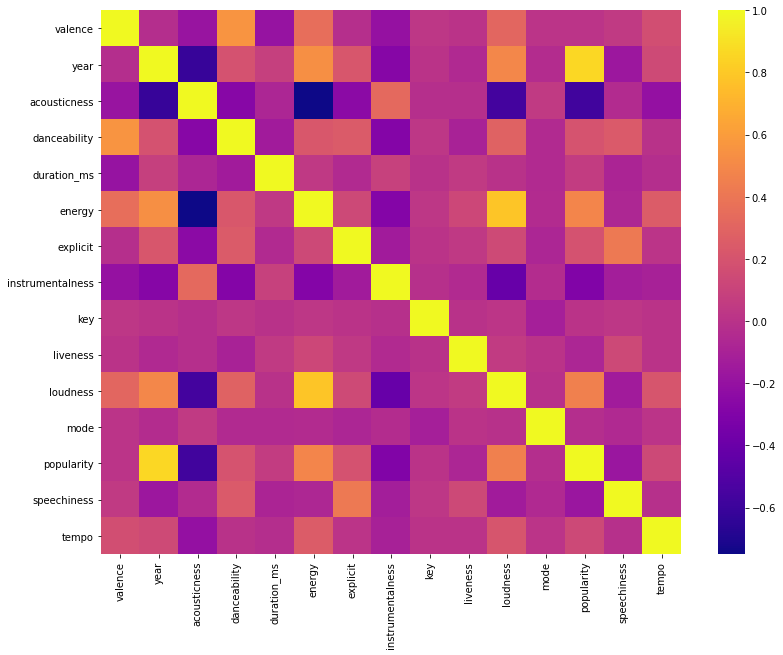

In [88]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), cmap='plasma');


In [89]:
df.corr()['popularity'].sort_values(ascending=False)

popularity          1.000000
year                0.862442
energy              0.485005
loudness            0.457051
danceability        0.199606
explicit            0.191543
tempo               0.133310
duration_ms         0.059597
valence             0.014200
key                 0.007826
mode               -0.028897
liveness           -0.076464
speechiness        -0.171979
instrumentalness   -0.296750
acousticness       -0.573162
Name: popularity, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


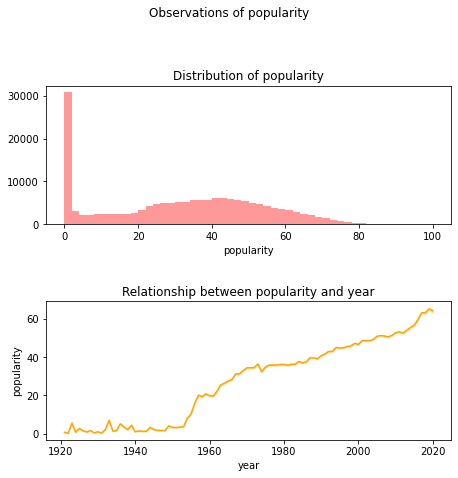

In [90]:
# Set the target variable
y = df.popularity
 
fig,axs = plt.subplots(2,1, figsize=(7,7))
fig.suptitle('Observations of popularity')
 
# Observe the distribution of 'popularity'axs[0].set_title('Distribution of popularity')
axs[0].set_title('Distribution of popularity')
sns.distplot(df['popularity'], ax=axs[0], kde=False, color="red")
 
axs[1].set_title('Relationship between popularity and year')
sns.lineplot(x='year', y='popularity', data=df, color="orange", ax=axs[1])
 
fig.tight_layout(pad=3.0)

Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.

**Now we will see popularity of songs by its track name**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'White Christmas'),
  Text(1, 0, 'Winter Wonderland'),
  Text(2, 0, 'Home'),
  Text(3, 0, 'Summertime'),
  Text(4, 0, 'Stay'),
  Text(5, 0, 'You'),
  Text(6, 0, 'Runaway'),
  Text(7, 0, 'Forever'),
  Text(8, 0, 'Hold On'),
  Text(9, 0, 'Silent Night'),
  Text(10, 0, 'Jingle Bells'),
  Text(11, 0, 'Angel'),
  Text(12, 0, 'Intro'),
  Text(13, 0, 'Alone'),
  Text(14, 0, 'Without You'),
  Text(15, 0, 'Sleigh Ride'),
  Text(16, 0, 'Heaven'),
  Text(17, 0, 'Beautiful'),
  Text(18, 0, 'Have Yourself a Merry Little Christmas'),
  Text(19, 0, 'Smile')])

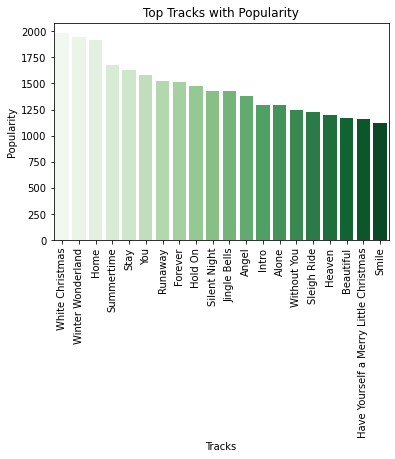

In [91]:
g_pn = df.groupby("name")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(g_pn.index, g_pn,palette='Greens')
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

**Now we will see popularity of songs by its artists**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, "['The Beatles']"),
  Text(1, 0, "['Frank Sinatra']"),
  Text(2, 0, "['Elvis Presley']"),
  Text(3, 0, "['The Rolling Stones']"),
  Text(4, 0, "['Fleetwood Mac']"),
  Text(5, 0, "['Bob Dylan']"),
  Text(6, 0, "['Led Zeppelin']"),
  Text(7, 0, "['Queen']"),
  Text(8, 0, "['Johnny Cash']"),
  Text(9, 0, "['The Beach Boys']"),
  Text(10, 0, "['Taylor Swift']"),
  Text(11, 0, "['Bob Marley & The Wailers']"),
  Text(12, 0, "['Vicente Fernández']"),
  Text(13, 0, "['Red Hot Chili Peppers']"),
  Text(14, 0, "['Elton John']"),
  Text(15, 0, "['Pink Floyd']"),
  Text(16, 0, "['Eminem']"),
  Text(17, 0, "['Metallica']"),
  Text(18, 0, "['Dean Martin']"),
  Text(19, 0, "['BTS']")])

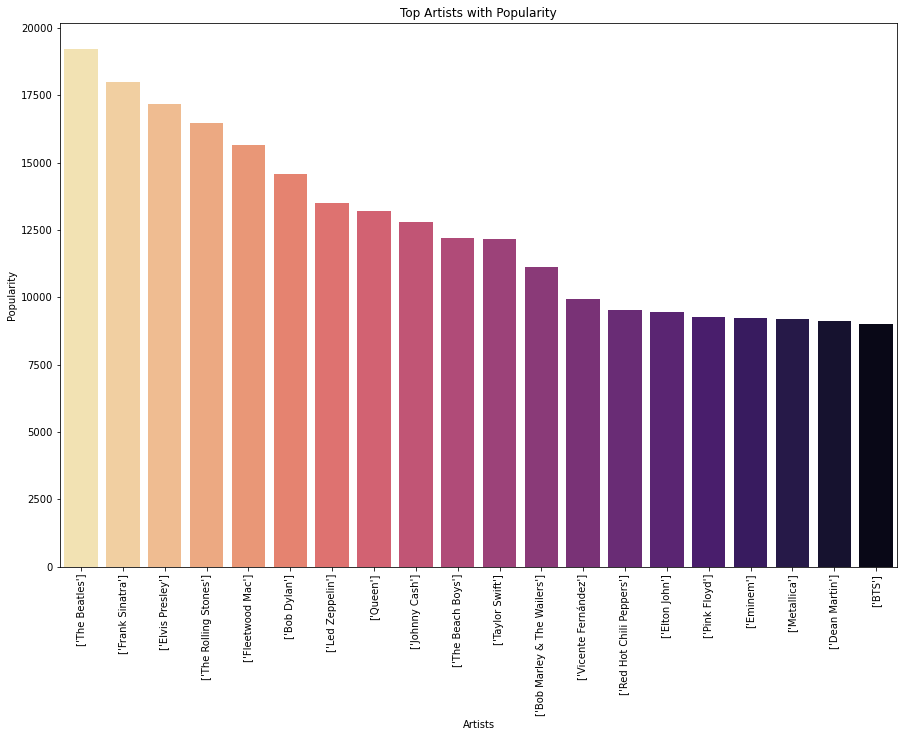

In [92]:
g_ap = df.groupby("artists")['popularity'].sum().sort_values(ascending=False)[:20]
plt.figure(figsize=(15,10))
axis = sns.barplot(g_ap.index, g_ap,palette='magma_r')
axis.set_title('Top Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Artists')
plt.xticks(rotation = 90)

**Now let us see the names of the top artists by their tracks.**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


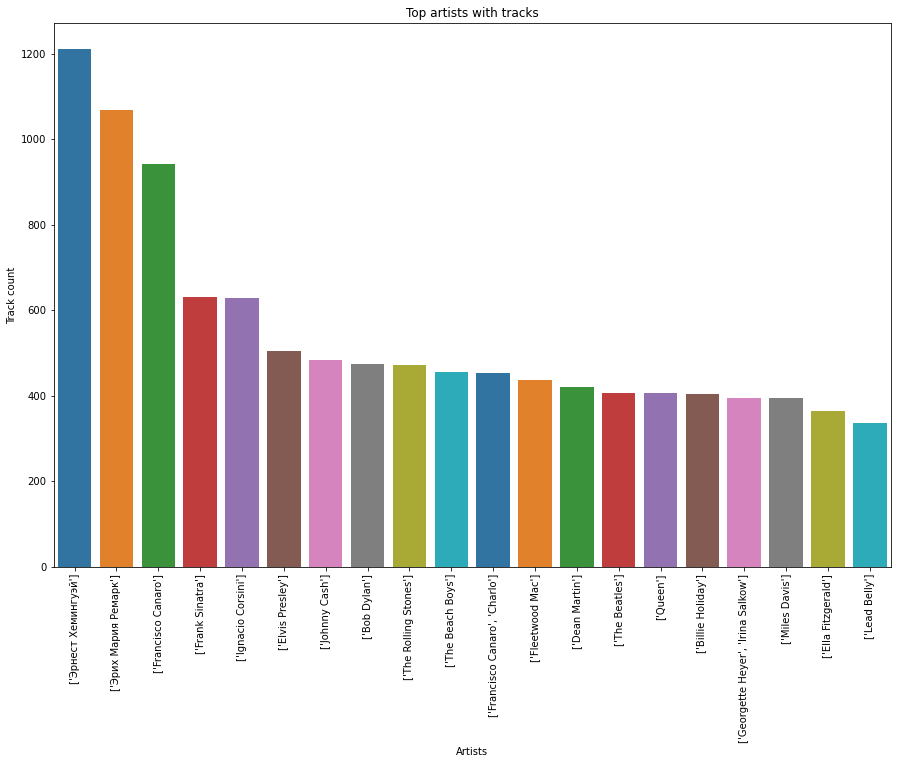

In [93]:
g_an = df.groupby('artists')['name'].count().sort_values(ascending=False)[:20]
plt.figure(figsize=(15,10))
axis = sns.barplot(g_an.index, g_an,palette='tab10')
axis.set_title('Top artists with tracks')
axis.set_ylabel('Track count')
axis.set_xlabel('Artists')
plt.xticks(rotation = 90)
plt.show()

**Now let us see the names of the top artists by their danceability.**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


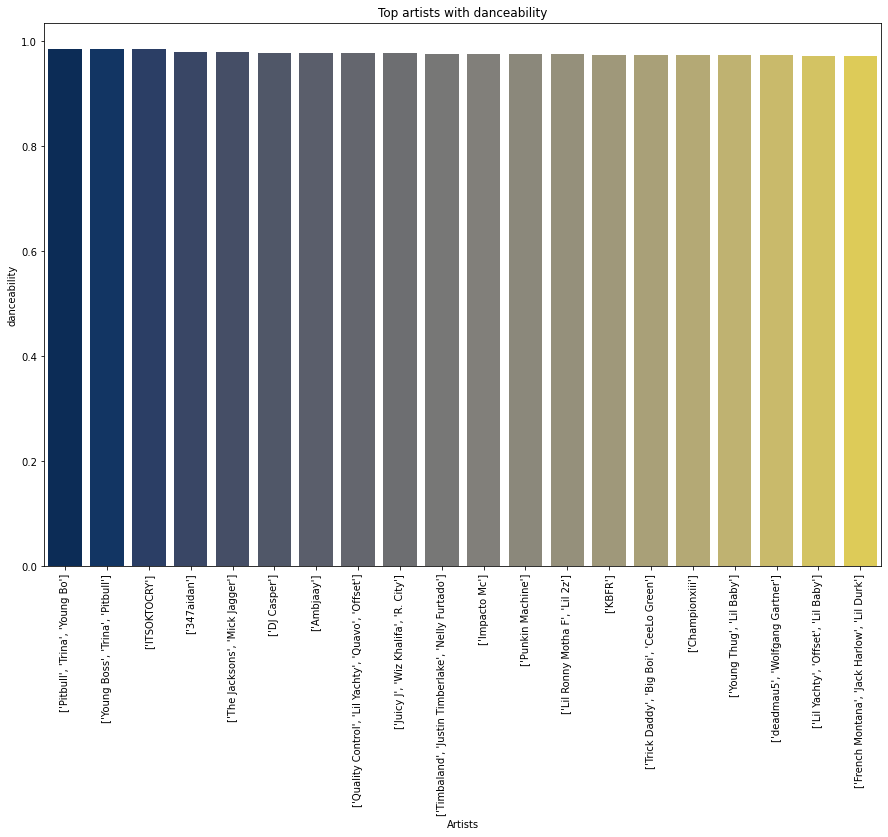

In [94]:
g_an = df.groupby('artists')['danceability'].mean().sort_values(ascending=False)[:20]
plt.figure(figsize=(15,10))
axis = sns.barplot(g_an.index, g_an,palette='cividis')
axis.set_title('Top artists with danceability')
axis.set_ylabel('danceability')
axis.set_xlabel('Artists')
plt.xticks(rotation = 90)
plt.show()

In [95]:
df['year'].describe()

count    170653.000000
mean       1976.787241
std          25.917853
min        1921.000000
25%        1956.000000
50%        1977.000000
75%        1999.000000
max        2020.000000
Name: year, dtype: float64

In [96]:
bins = [1920,1960,2000,2021]
df['year_bins'] = pd.cut(df['year'],bins,labels=['20s-60s','60s-2000','2000-2020'])
df['year_bins'].head(10)

0    20s-60s
1    20s-60s
2    20s-60s
3    20s-60s
4    20s-60s
5    20s-60s
6    20s-60s
7    20s-60s
8    20s-60s
9    20s-60s
Name: year_bins, dtype: category
Categories (3, object): ['20s-60s' < '60s-2000' < '2000-2020']

In [97]:
df['year_bins'].value_counts()

60s-2000     79406
20s-60s      51753
2000-2020    39494
Name: year_bins, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


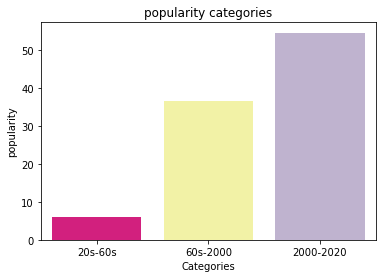

In [98]:
g_yp = df.groupby('year_bins')['popularity'].mean().sort_values(ascending=False)[:20]
axis = sns.barplot(g_yp.index, g_yp,palette='Accent_r')
axis.set_title('popularity categories')
axis.set_xlabel('Categories')
axis.set_ylabel('popularity')
plt.show()

# **Show the details(year, artist name, song name, release date and duration) for 3 songs with highest duration and 3 songs with lowest duration for the year 2016**

In [99]:
year_avg = df[['danceability','energy','liveness','acousticness', 'valence','duration_ms']].groupby(df['year']==2016).mean().sort_values(by='year',ascending=[False]).reset_index()
year_avg.head(3)

,year,danceability,energy,liveness,acousticness,valence,duration_ms
0,True,0.600202,0.592855,0.181170,0.284171,0.431532,221396.510295
1,False,0.536727,0.481213,0.206101,0.504434,0.529620,231049.962874


Here we have mean of max duration that is **231049.962874** for the year 2016. 

In [100]:
max_duration = df[['artists','name', 'release_date', 'duration_ms']]
max_duration = max_duration.sort_values(by=['duration_ms'],ascending=[False])
#max_duration.groupby(df['year']==2016)

max_duration.artists = max_duration.artists.str.strip('[]').str.replace("'", "")

max_duration.head(3)

,artists,name,release_date,duration_ms
107341,Sound Dreamer,Brown Noise - 90 Minutes,2013-06-05,5403500
138618,Sounds for Life,Brown Noise for Sleep,2009-03-15,4270034
168377,"Lightning, Thunder and Rain Storm",Midnight Thunderstorm Part 2,2009-09-22,4269407


Above is the highest duration at all

In [101]:
df['duration_ms'].describe()

count    1.706530e+05
mean     2.309483e+05
std      1.261184e+05
min      5.108000e+03
25%      1.698270e+05
50%      2.074670e+05
75%      2.624000e+05
max      5.403500e+06
Name: duration_ms, dtype: float64

In [102]:
year_avg = df[['danceability','energy','liveness','acousticness', 'valence','duration_ms']].groupby(df['year']==2016).mean().sort_values(by='year',ascending=[False]).reset_index()
year_avg.head(3)

,year,danceability,energy,liveness,acousticness,valence,duration_ms
0,True,0.600202,0.592855,0.181170,0.284171,0.431532,221396.510295
1,False,0.536727,0.481213,0.206101,0.504434,0.529620,231049.962874


Here we have mean of low duration that is **221396.510295** for the year 2016.

In [103]:
df.groupby(df['year']==2016).mean().sort_values(by=["duration_ms"],ascending=[True])
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,year_bins
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,20s-60s
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,20s-60s
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339,20s-60s
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109,20s-60s
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,20s-60s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029,2000-2020
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936,2000-2020
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688,2000-2020
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055,2000-2020


In [104]:
max_duration = df[['artists','name', 'release_date', 'duration_ms']]
max_duration = max_duration.sort_values(by=['duration_ms'],ascending=[True])
#max_duration.groupby(df['year']==2016)

max_duration.artists = max_duration.artists.str.strip('[]').str.replace("'", "")

max_duration.head(3)

,artists,name,release_date,duration_ms
78141,Sarah Vaughan,Pause Track,1949,5108
22399,Benny Goodman,Pause Track - Live,1938,5991
22464,Benny Goodman,Pause Track - Live,1938,6362


Above is the lowest duration in ms at all

> Let's go ahead and do more visulizations. 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

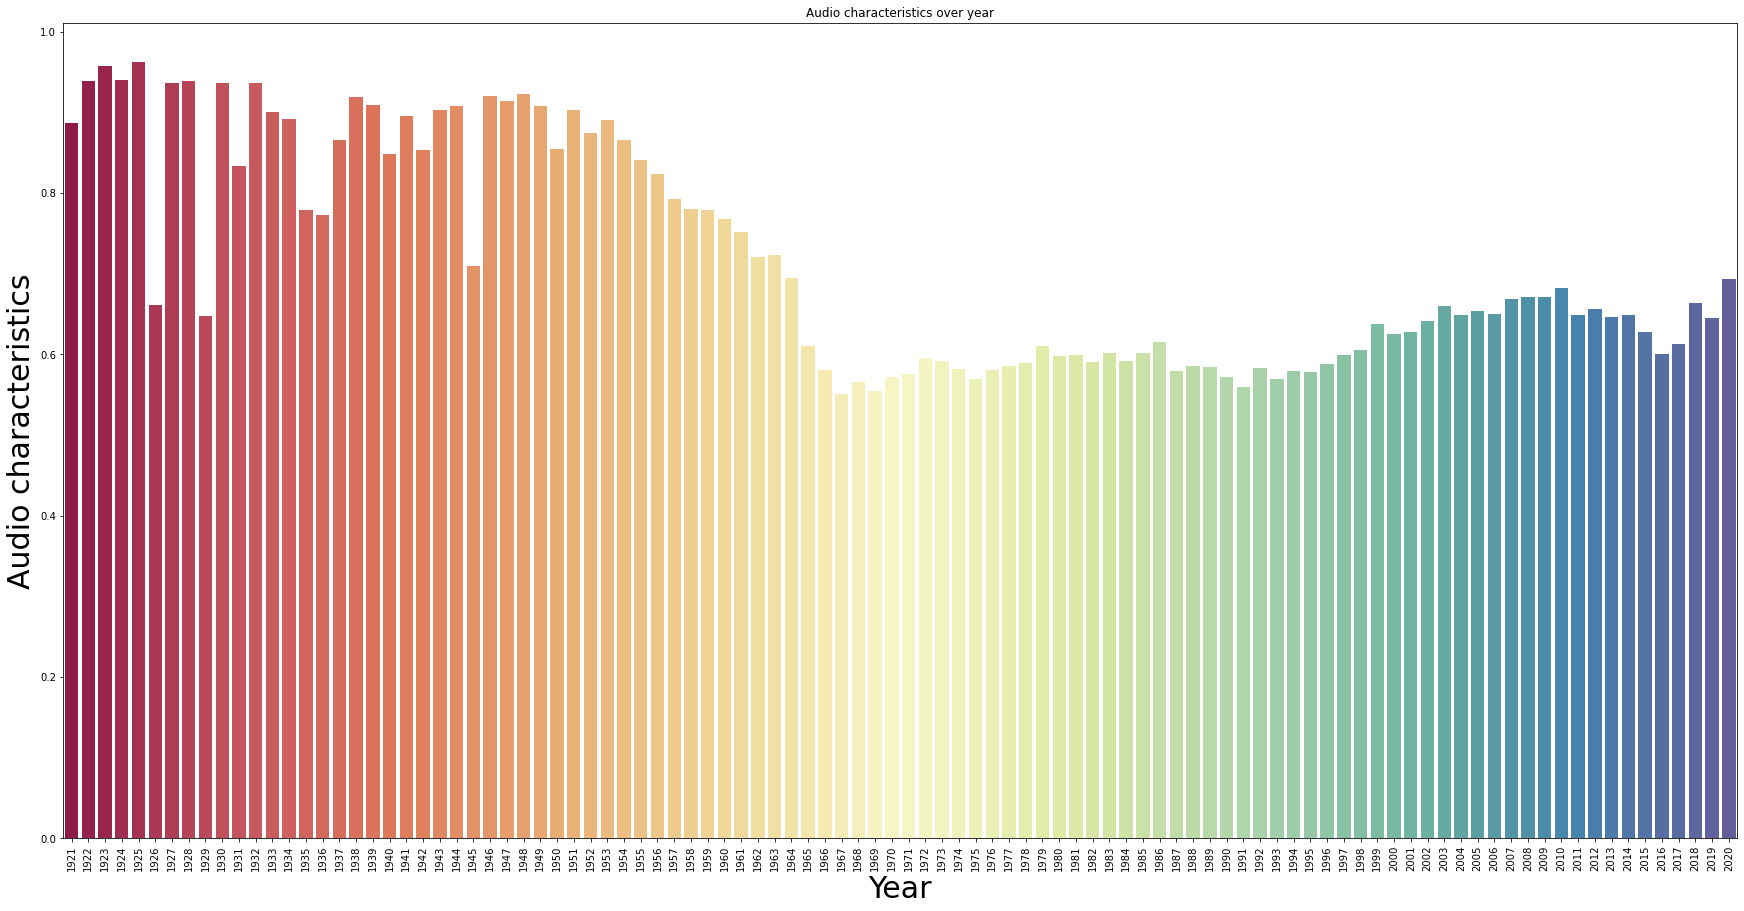

In [105]:
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(30,15))
for c in columns:
    x = df.groupby('year')[c].mean()
    sns.barplot(x.index,x,label=c,palette="Spectral")
plt.title('Audio characteristics over year')
plt.xlabel('Year',size=30)
plt.ylabel('Audio characteristics',size=30)
plt.xticks(rotation = 90)
plt.show()

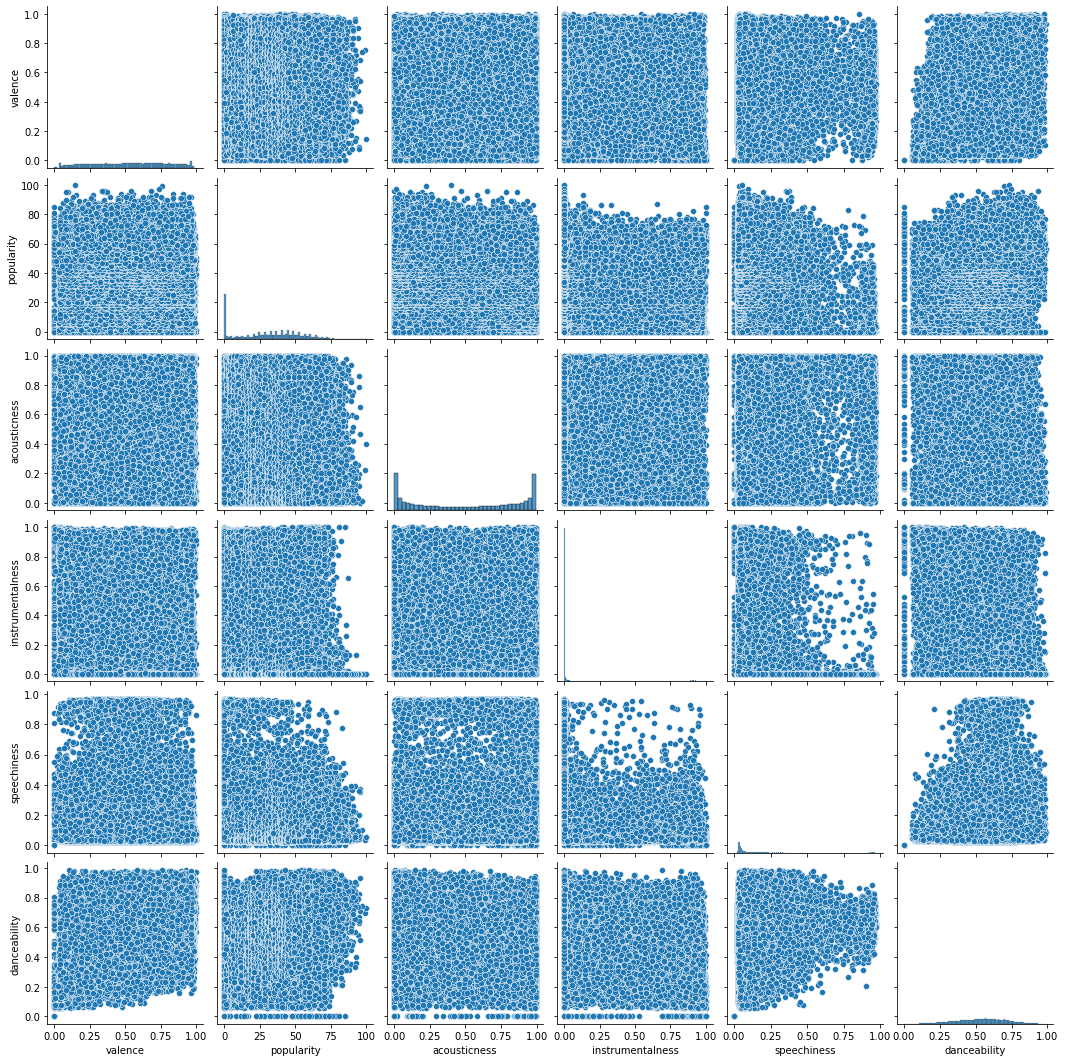

In [106]:
pairplot_all_column = ["valence","popularity","acousticness","instrumentalness","speechiness","danceability" ]
sns.pairplot(df[pairplot_all_column])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


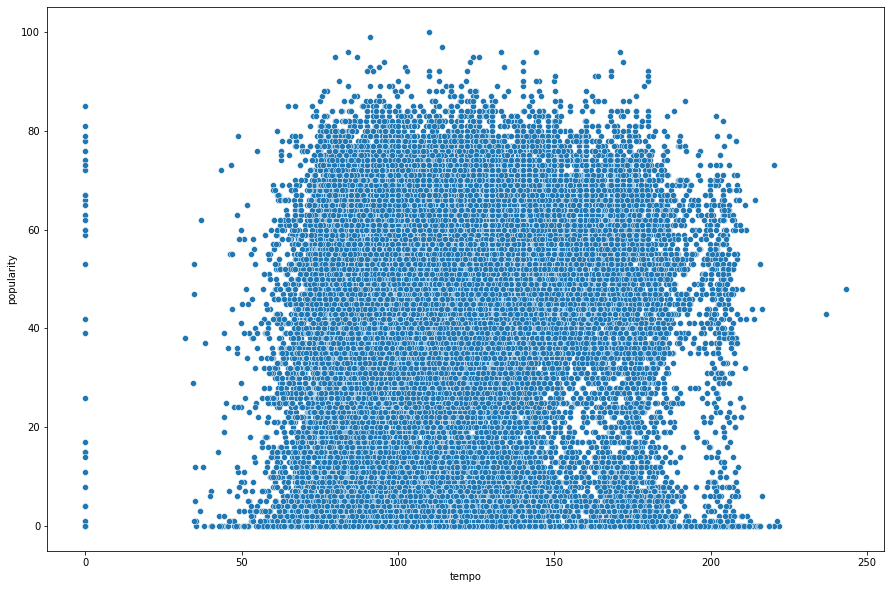

In [107]:
plt.figure(figsize=(15,10))
d = df[:50000]
sns.scatterplot('tempo','popularity',data=d)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


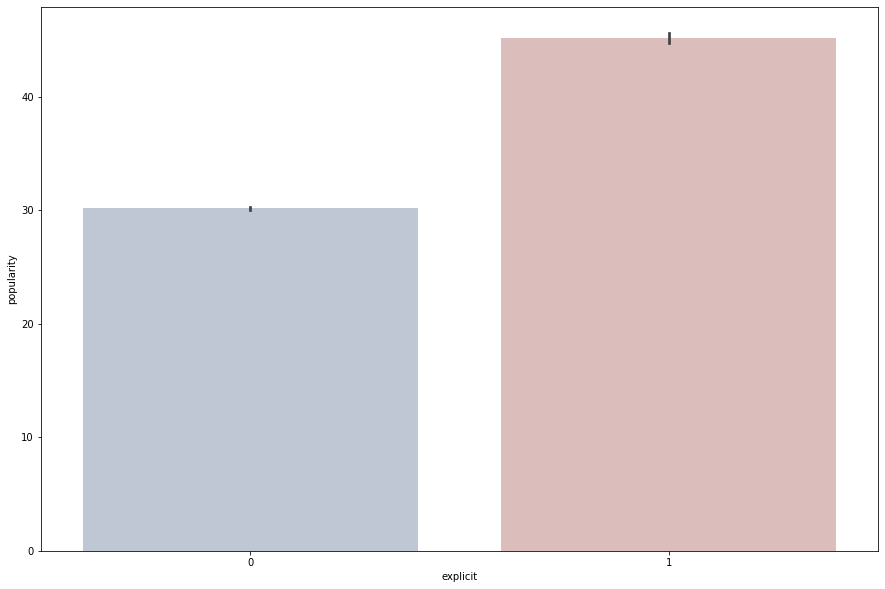

In [108]:
plt.figure(figsize=(15,10))
sns.barplot('explicit','popularity',data=df,palette='vlag')
plt.show()

Index(['['Frank Sinatra']', '['Pink Floyd']', '['Queen']', '['Fleetwood Mac']',
       '['Bob Marley & The Wailers']', '['Elvis Presley']', '['Elton John']',
       '['Eminem']', '['Taylor Swift']', '['Led Zeppelin']', '['Dean Martin']',
       '['The Beach Boys']', '['BTS']', '['Vicente Fernández']',
       '['The Rolling Stones']', '['Metallica']', '['Bob Dylan']',
       '['The Beatles']', '['Johnny Cash']', '['Red Hot Chili Peppers']'],
      dtype='object')


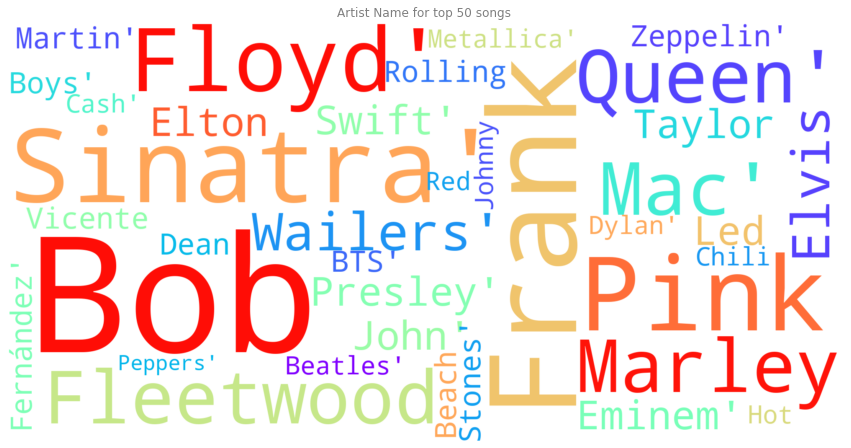

In [109]:
words = g_ap.index.str.split("(").str[0].value_counts().keys()
print(words)
wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(words))
plt.figure(figsize=(15,10))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Artist Name for top 50 songs ",color='grey')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


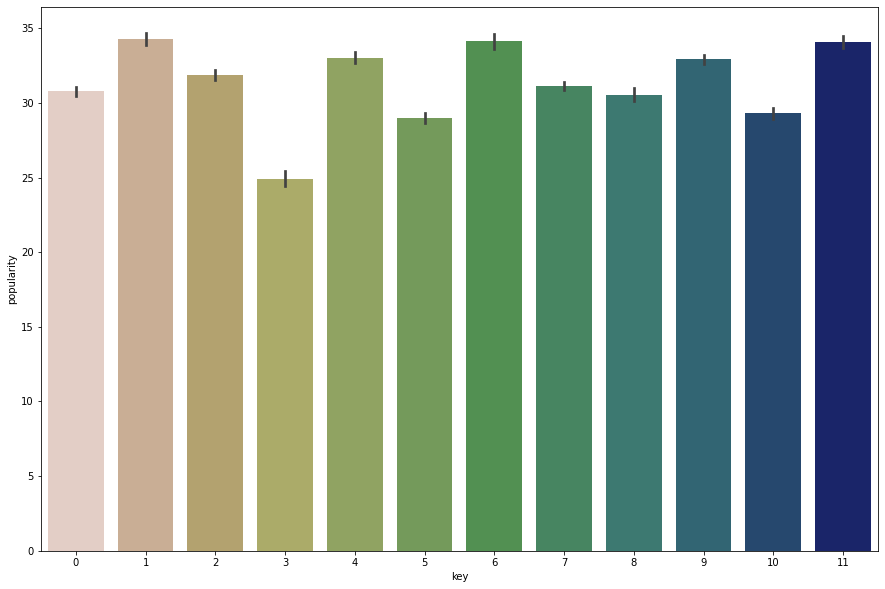

In [110]:
plt.figure(figsize=(15,10))
sns.barplot('key','popularity',data=df,palette="gist_earth_r")
plt.show()

# Thanks.
# Created by 180420107044-Meet 🙏